In [13]:
# Number of data points to plot
num_points = 5

# Parameter ranges below
gc_actual = 0.1
# gc = 0 will lead to singular matrix during V_th computation, so don't set to 0.
gc_lo = 0.05
gc_hi = 0.5

ggap_actual = 1.0
ggap_lo = 0
ggap_hi = 1.5

gsyn_actual = 1.0
gsyn_lo = 0
gsyn_hi = 1.5

C_actual = 0.015
# Only the last n_timesteps will be used for PCA analysis. This is to discard unstability
n_timesteps_to_analyze = 1000

In [9]:
import numpy as np
import pandas as pd
import time
from neural_model import NeuralModel
from simulation_functions import *
from sklearn.decomposition import PCA
from util.analysis_util import *
from util.neuron_metadata import *
from util.plot_util import *

def gen_simulation_data(param_lo, param_hi, param_to_full_param_fcn, num_points):
  param_vals = []
  dom_amplitude_vals = []
  dom_amplitude_diff_raw_vals = []
  dom_amplitude_diff_scaled_vals = []
  dom_period_vals = []
  dimensionality_vals = []

  i = 0
  for param in np.linspace(param_lo, param_hi, num_points):
    i += 1
    start_time = time.time()
    param_vec = param_to_full_param_fcn(param)
    all_dynamics = simulate_until_stable(
      C = param_vec['C'], Gc = param_vec['Gc'], ggap = param_vec['ggap'], gsyn = param_vec['gsyn'])
    fwd_dynamics = all_dynamics[all_dynamics.shape[0] - n_timesteps_to_analyze:,:]
    elapsed_time = time.time() - start_time
    print("Iteration {0}/{1} for param {2:.4f} took {3:.2f}s".format(i, num_points, param, elapsed_time))

    n = fwd_dynamics.shape[0]
    X = fwd_dynamics - fwd_dynamics.mean(axis = 0)
    pca = PCA()
    projected_X = pca.fit_transform(fwd_dynamics)
    dom_mode = projected_X[:,0]
    dom_amplitude = get_amplitude(dom_mode)
    dom_amplitude_diff_raw, dom_amplitude_diff_scaled = get_amplitude_differences(dom_mode)
    dom_period = get_period(dom_mode)
    eigen_vals = get_eigenvalues_from_pca(pca, n)
    dimensionality = get_dimensionality(eigen_vals)

    param_vals.append(param)
    dom_amplitude_vals.append(dom_amplitude)
    dom_amplitude_diff_raw_vals.append(dom_amplitude_diff_raw)
    dom_amplitude_diff_scaled_vals.append(dom_amplitude_diff_scaled)
    dom_period_vals.append(dom_period)
    dimensionality_vals.append(dimensionality)
  return (param_vals, dom_amplitude_vals, dom_amplitude_diff_raw_vals,
          dom_amplitude_diff_scaled_vals, dom_period_vals, dimensionality_vals)

def plot_simulation_results(param_vals, dom_amplitude_vals,
                            dom_amplitude_diff_raw_vals, dom_amplitude_diff_scaled_vals,
                            dom_period_vals, dimensionality_vals):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
  ax = axes[0]
  ax.scatter(param_vals, dom_amplitude_vals)
  ax.set_title("Dom amplitude")
  ax = axes[1]
  ax.scatter(param_vals, dom_amplitude_diff_raw_vals)
  ax.set_title("Dom amplitude diff raw")
  ax = axes[2]
  ax.scatter(param_vals, dom_amplitude_diff_scaled_vals)
  ax.set_title("Dom amplitude diff scaled")
  ax = axes[3]
  ax.scatter(param_vals, dom_period_vals)
  ax.set_title("Dom period")
  ax = axes[4]
  ax.scatter(param_vals, dimensionality_vals)
  ax.set_title("Dimensionality")
  return fig

# Gc tweaks

Simulation length 1000.00, raw amplitude diff 4576.65, scaled amplitude diff 37.57, amplitude 37.57
Simulation length 2000.00, raw amplitude diff 2.64, scaled amplitude diff 0.01, amplitude 0.01
Iteration 1/5 for param 0.0500 took 3.03s
Simulation length 1000.00, raw amplitude diff 4098.78, scaled amplitude diff 51.74, amplitude 51.74
Simulation length 2000.00, raw amplitude diff 0.71, scaled amplitude diff 0.00, amplitude 0.00
Iteration 2/5 for param 0.1625 took 2.78s
Simulation length 1000.00, raw amplitude diff 3735.31, scaled amplitude diff 69.68, amplitude 69.68
Simulation length 2000.00, raw amplitude diff 0.19, scaled amplitude diff 0.00, amplitude 0.00
Iteration 3/5 for param 0.2750 took 2.08s
Simulation length 1000.00, raw amplitude diff 3402.15, scaled amplitude diff 106.71, amplitude 106.71
Simulation length 2000.00, raw amplitude diff 0.13, scaled amplitude diff 0.00, amplitude 0.00
Iteration 4/5 for param 0.3875 took 1.67s
Simulation length 1000.00, raw amplitude diff 3094

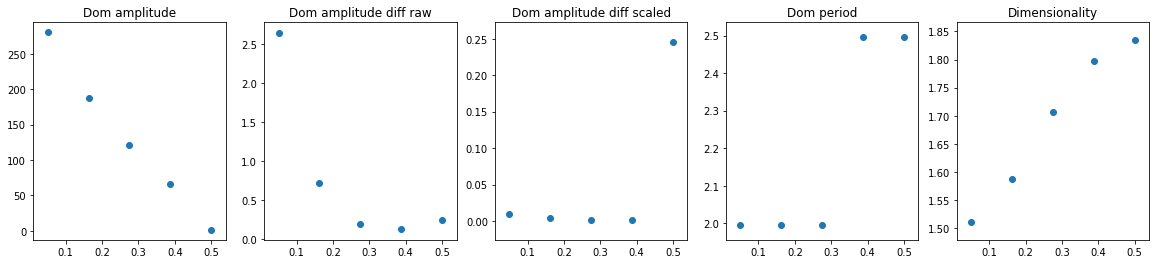

In [10]:
def gc_to_full_param(gc):
  return {
    'C': C_actual,
    'Gc': gc,
    'ggap': ggap_actual,
    'gsyn': gsyn_actual
  }

gc_simulation_data = gen_simulation_data(gc_lo, gc_hi, gc_to_full_param, num_points)
fig = plot_simulation_results(*gc_simulation_data)

# Ggap tweaks

Simulation length 1000.00, raw amplitude diff 997.76, scaled amplitude diff 17183.38, amplitude 17183.38
Simulation length 2000.00, raw amplitude diff 0.16, scaled amplitude diff 1.00, amplitude 1.00
Iteration 1/5 for param 0.0000 took 1.19s
Simulation length 1000.00, raw amplitude diff 4044.84, scaled amplitude diff 324.43, amplitude 324.43
Simulation length 2000.00, raw amplitude diff 24.08, scaled amplitude diff 1.23, amplitude 1.23
Simulation length 4000.00, raw amplitude diff 0.24, scaled amplitude diff 0.10, amplitude 0.10
Iteration 2/5 for param 0.3750 took 3.56s
Simulation length 1000.00, raw amplitude diff 4199.90, scaled amplitude diff 23.99, amplitude 23.99
Simulation length 2000.00, raw amplitude diff 4.62, scaled amplitude diff 0.01, amplitude 0.01
Iteration 3/5 for param 0.7500 took 3.68s
Simulation length 1000.00, raw amplitude diff 4409.47, scaled amplitude diff 63.13, amplitude 63.13
Simulation length 2000.00, raw amplitude diff 0.84, scaled amplitude diff 0.00, amplit

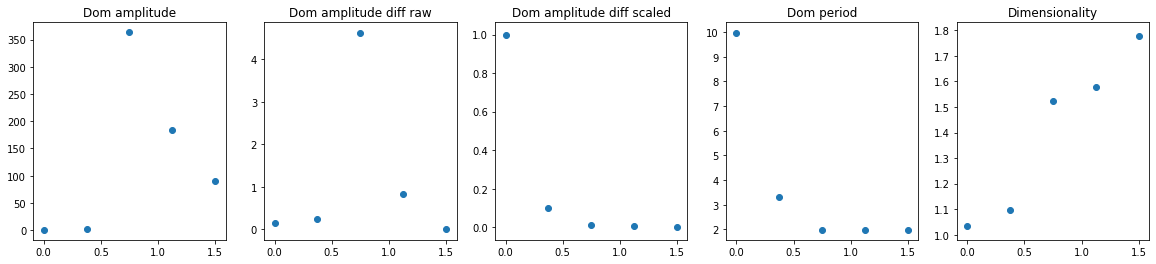

In [11]:
def ggap_to_full_param(ggap):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap,
    'gsyn': gsyn_actual
  }

ggap_simulation_data = gen_simulation_data(ggap_lo, ggap_hi, ggap_to_full_param, num_points)
fig = plot_simulation_results(*ggap_simulation_data)

# Gsyn tweaks

Simulation length 1000.00, raw amplitude diff 7898.08, scaled amplitude diff 581277.08, amplitude 581277.08
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 10.89, amplitude 10.89
Iteration 1/5 for param 0.0000 took 0.93s
Simulation length 1000.00, raw amplitude diff 8060.81, scaled amplitude diff 21010.86, amplitude 21010.86
Simulation length 2000.00, raw amplitude diff 0.00, scaled amplitude diff 0.38, amplitude 0.38
Iteration 2/5 for param 0.3750 took 1.31s
Simulation length 1000.00, raw amplitude diff 5148.24, scaled amplitude diff 44.10, amplitude 44.10
Simulation length 2000.00, raw amplitude diff 0.06, scaled amplitude diff 0.00, amplitude 0.00
Iteration 3/5 for param 0.7500 took 3.15s
Simulation length 1000.00, raw amplitude diff 4229.49, scaled amplitude diff 47.83, amplitude 47.83
Simulation length 2000.00, raw amplitude diff 5.73, scaled amplitude diff 0.03, amplitude 0.03
Iteration 4/5 for param 1.1250 took 2.80s
Simulation length 1000.00, raw ampli

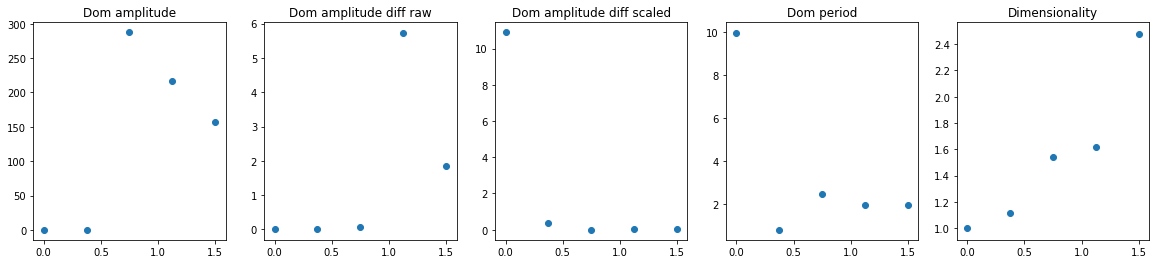

In [12]:
def gsyn_to_full_param(gsyn):
  return {
    'C': C_actual,
    'Gc': gc_actual,
    'ggap': ggap_actual,
    'gsyn': gsyn
  }

gsyn_simulation_data = gen_simulation_data(gsyn_lo, gsyn_hi, gsyn_to_full_param, num_points)
fig = plot_simulation_results(*gsyn_simulation_data)